# Predicting the optimum number of clusters in Iris dataset(UnSupervised Learning)


### NAME -Tania Arora

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### Importing Iris dataset

In [4]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There are no null cells. We will now continue to standardize our data i.e transforming it to mean=0 and deviation=1. Since we'll be using PCA method(which is sensitive to variances) to reduce the dimensionality from 4 to 2 for better visualization.

### Standardizing Iris dataset

In [6]:
from sklearn.preprocessing import StandardScaler

In [11]:
standard=StandardScaler().fit_transform(data)
standard[0:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### Principal Component Analysis

We can either go by finding covariance-variance matrix , eigen vectors and values. And then finding our pca columns. I will use directly Python library for finding reduced columns.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(.95)  #columns such that we have 95% of data included
principalComponents = pca.fit_transform(standard) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) b

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


Plotting reduced data

<function matplotlib.pyplot.show(close=None, block=None)>

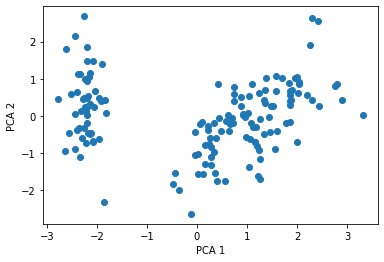

In [14]:
plt.scatter(principalDf.iloc[:,0].values,principalDf.iloc[:,1].values)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show

## Clustering our data using KMeans

### Finding number of clusters using elbow method

In [15]:
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show(close=None, block=None)>

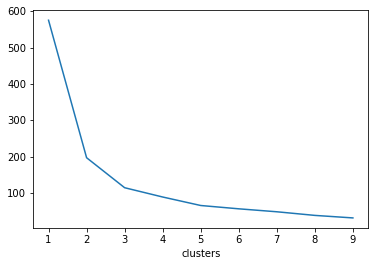

In [19]:
x=principalDf.iloc[:,[0,1]].values
wcss =[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,max_iter=350)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.xlabel("clusters")
plt.show

From above elbow method we can conclude that there will be 3 clusters.(We have iterated the values of k from 1 to 10 and calculated the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range. K value for which inertia will be least is takes as number of optimum clusters)

### Fitting our data in kmeans model from sklearn

From above discussion we have concluded that optimum number of clusters will be 3.

In [20]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

Predicting cluster label for each observation

In [21]:
labels=kmeans.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Finding the 3 Centroid of the clusters formed by kmeans clustering method

In [22]:
centroid=kmeans.cluster_centers_
centroid

array([[ 0.61742366, -0.79845836],
       [-2.22475316,  0.28892745],
       [ 1.71731904,  0.65486305]])

## Visual Representation of the 3 clusters

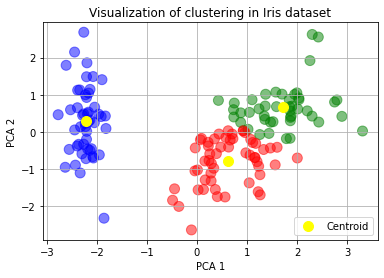

In [31]:
colmap={1:"red",2:"blue",3:"green"}
colors=map(lambda x:colmap[x+1],labels)
colors1=list(colors)
fig,ax=plt.subplots()
ax.scatter(principalDf.iloc[:,0].values,principalDf.iloc[:,1].values,color=colors1,alpha=0.5,s=100)
plt.scatter(centroid[:,0],centroid[:,1],s=100,c="yellow" ,label= 'Centroid')    
plt.xlabel("PCA 1")
plt.ylabel('PCA 2')
plt.title("Visualization of clustering in Iris dataset")
plt.grid()
plt.legend()
plt.show()